# Predicting superconducting transition temperature from elemental physical properties

In this notebook, the raw data of materials and elemental physical properties is investigated. The data used in this project is taken from __[K. Hamidieh, Computational Materials Science 154 (2018) 346–354](https://www.sciencedirect.com/science/article/abs/pii/S0927025618304877)__. 
- [Check for Data type, missing values, duplicates, and outliers](#clean)
- [Exploratory Data Analysis](#eda)
- [Save cleaned data](#save)

***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Import data

There are 2 csv files: __unique_m.csv__ and __train.csv__.

__unique_m.csv__ contains chemical formula and superconducting critical temperature of each compound. The first 86 columns are names of elements and numbers indicate the number of that element in the compound.

In [3]:
materials = pd.read_csv('../data/raw/unique_m.csv')
materials

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


__train.csv__ contains features which are elemental physical properties and superconducting transition temperature. _This is the data that will be used in training and testing models_. The features and critical temperature match with the compounds in unique_m.csv.

In [4]:
data = pd.read_csv('../data/raw/train.csv')
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


There are 82 columns; 81 features (X) and critical temperature (y)
- there are 8 physical properties: 
    1) atomic mass
    2) first ionization energy
    3) atomic radius
    4) density
    5) electron affinity
    6) fusion heat
    7) thermal conductivity
    8) valence
- each property has 10 features:
    1) mean
    2) weighted mean
    3) geometric mean
    4) weighted geometric mean
    5) entropy
    6) weighted entropy
    7) range
    8) weighted range
    9) standard deviation
    10) weighted standard deviation
- other 2 columns are number of elements and critical temperature

# Check for Data type, missing values, duplicates, and outliers<a id='clean'><a>

In [45]:
# Check dtypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

All columns are number and most are float. Columns of number_of_elements, range_atomic_radius, range_Valence are int.

In [46]:
data.isna().any().any()

False

No missing values

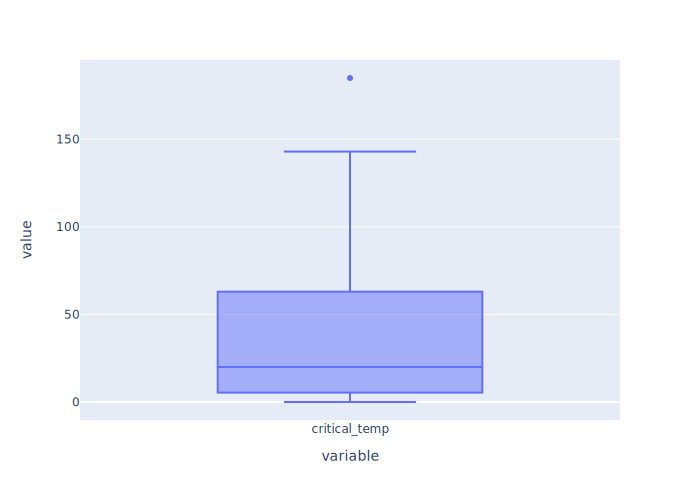

In [5]:
fig = px.box(data.critical_temp)
fig.show('svg')

In [48]:
data.critical_temp.max()

185.0

In [49]:
materials.critical_temp.max()

185.0

**There is one outlier with critical_temperature at 185 Kelvin**

In [6]:
data = data.loc[data.critical_temp!=185]
materials = materials.loc[materials.critical_temp!=185]

Remove outlier.

In [7]:
data.shape, materials.shape

((21262, 82), (21262, 88))

Check for duplicates

In [53]:
materials.duplicated().any(), data.duplicated().any()

(False, True)

data DF indicates there are duplicates while no duplicates are detected in materials DF. 

In [96]:
materials.loc[data.duplicated(keep=False)].material.unique()

array(['Y2Ba4Cu6O13.9', 'Y1Ba2Cu3O6.95', 'Ga0.205V0.795', 'Ga0.222V0.778',
       'Ga0.236V0.764', 'Ga0.248V0.752', 'Ga0.253V0.747', 'Ga0.265V0.735',
       'Ga0.25V0.75', 'Si1V3', 'Rh1Zr3', 'Al1Nb3', 'Au0.1C1.3Y0.9',
       'Au0.167Pd0.166Te0.667', 'B3Ru7', 'Bi0.1C1.45Y0.9',
       'C1.45Cr0.1Y0.9', 'C1.35Ge0.1Y0.9', 'C1.45Mo0.1Y0.9',
       'C1.35Nb0.1Y0.9', 'C1.35Sn0.1Y0.9', 'C1.35Si0.1Y0.9',
       'C1.35Ru0.1Y0.9', 'C1.35Ti0.1Y0.9', 'C1.5Ti0.3Y0.7',
       'C1.45V0.1Y0.9', 'Cu1Mo3S4', 'Ga7Pt3', 'Ga1V3', 'Hg1In1',
       'In0.25Sb0.75', 'La0.98Lu0.02', 'Mo3Se4', 'Nb0.5Os0.5',
       'Nb0.45Rh0.55', 'Nb0.375Rh0.625', 'Nb0.75Sn0.125Zr0.125',
       'Nb0.25Sn0.25V0.5', 'Nb0.5Sn0.25V0.25', 'Nb0.625Sn0.25V0.125',
       'Nb0.25Sn0.25Ta0.25V0.25', 'Nb0.5Sn0.25Ta0.125V0.125',
       'Nb0.25Sn0.25Ta0.5', 'Nb0.5Sn0.25Ta0.25', 'Nb0.625Sn0.25Ta0.125',
       'Pb0.8Pt0.2', 'Pd0.165Sb0.835', 'Pt1V3', 'Re0.75Ta0.25',
       'Rh0.4Ta0.6', 'Si0.25V0.75', 'Sn0.25Ta0.5V0.25',
       'Sn0.25Ta0.25V0.

__This is due to the fact that the same chemical formulas were written differently__. For example, Y2Ba4Cu6O13.9 can also be written as Y1Ba2Cu3O6.95.

Remove duplicates

In [8]:
data = data.drop_duplicates()
materials = materials.loc[data.index]

In [9]:
data.shape, materials.shape

((21196, 82), (21196, 88))

The number of samples is reduced from 21263 to 21196.

# Exploratory Data Analysis<a id='eda'><a>

Check correlation of each property and critical temperature

In [10]:
def Tc_corr(df: pd.DataFrame, cutoff=0.4)-> pd.DataFrame:
    '''Make heatmap, barplot, and jointplot on correlation with critical temperature and return the data with DF'''
    
    # heatmap
    fig = px.imshow(df.corr('kendall'), text_auto='.2f', width= 800, height=700)
    fig.show('svg')
    
    # barplot
    tc_corr = df.corr('kendall').critical_temp[:-1].sort_values()
    fig = px.bar(x=tc_corr,y=tc_corr.index, text_auto='.2f', range_x=(tc_corr.min()-0.1, tc_corr.max()+0.05))
    if (tc_corr > cutoff).any():
        fig.add_vline(x=cutoff, line_width=2, line_dash="dash", line_color="red")
    if (tc_corr < -cutoff).any():
        fig.add_vline(x=-cutoff, line_width=2, line_dash="dash", line_color="red")
    fig.update_layout(template = 'plotly_dark', yaxis_title='',xaxis_title='Correlation with Tc', width= 950, height=550)
    fig.show('svg')
    
    # print features that have corr more than cutoff
    col_list = tc_corr[tc_corr.abs()>cutoff].index
    print(f'Features that have high correlation (>{cutoff} or <-{cutoff}) with critical temp are')
    print(", ".join(col_list))
    
    # jointplot
    for i in col_list:
        sns.jointplot(df, x=i, y='critical_temp')
        plt.show()
    
    return pd.DataFrame({'Correlation':tc_corr})

In [11]:
properties = data.iloc[:,1:72:10].columns.str.replace('mean_','')
properties

Index(['atomic_mass', 'fie', 'atomic_radius', 'Density', 'ElectronAffinity',
       'FusionHeat', 'ThermalConductivity', 'Valence'],
      dtype='object')

atomic_mass


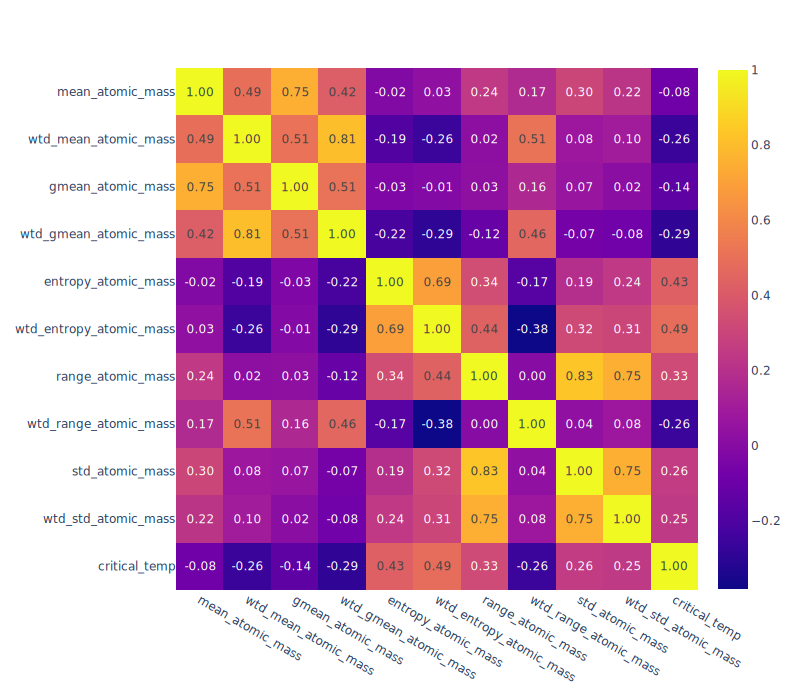

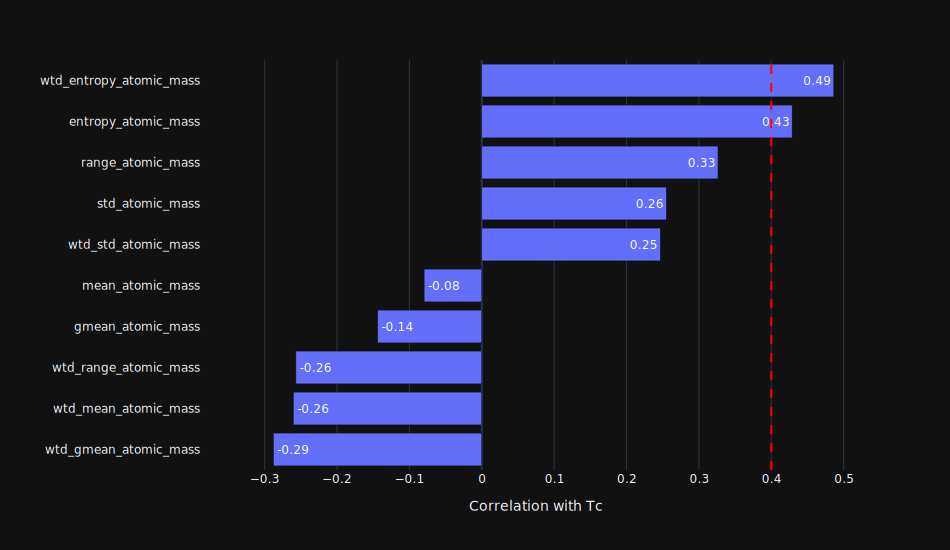

Features that have high correlation (>0.4 or <-0.4) with critical temp are
entropy_atomic_mass, wtd_entropy_atomic_mass


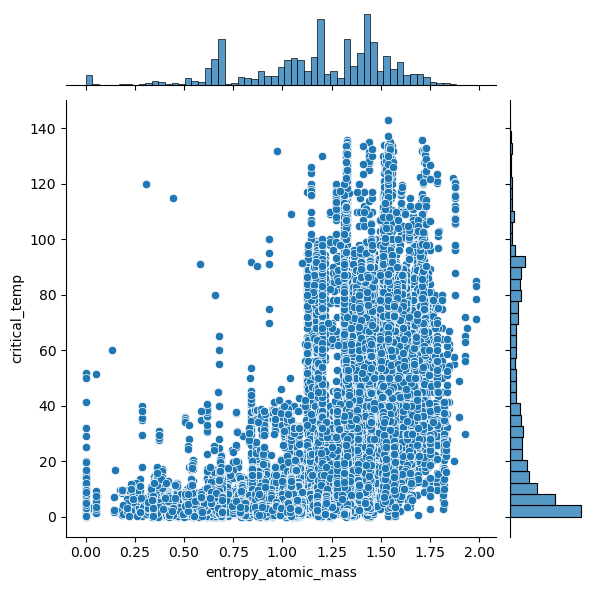

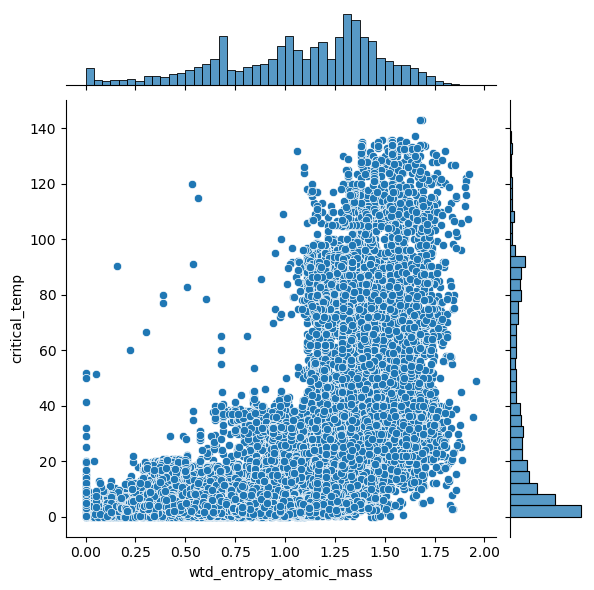

fie


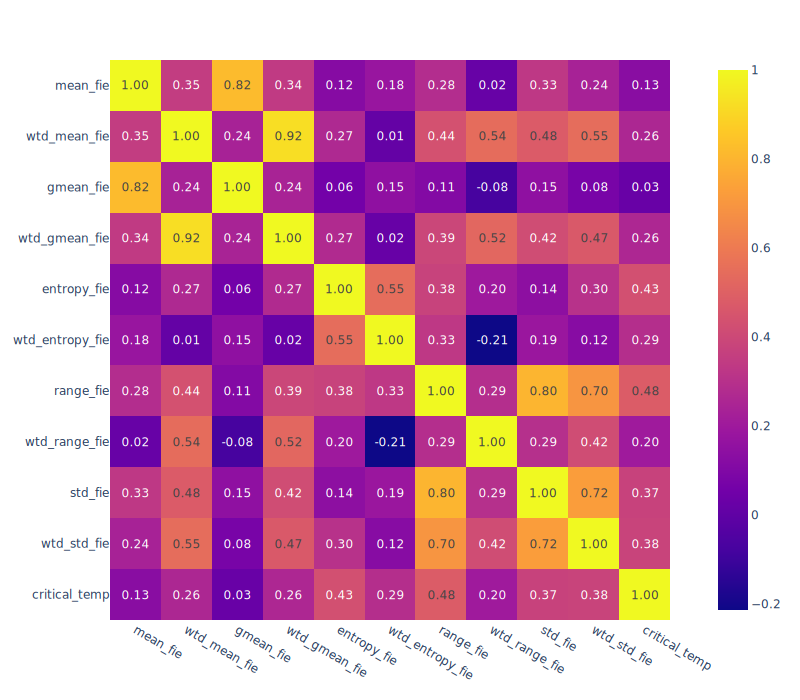

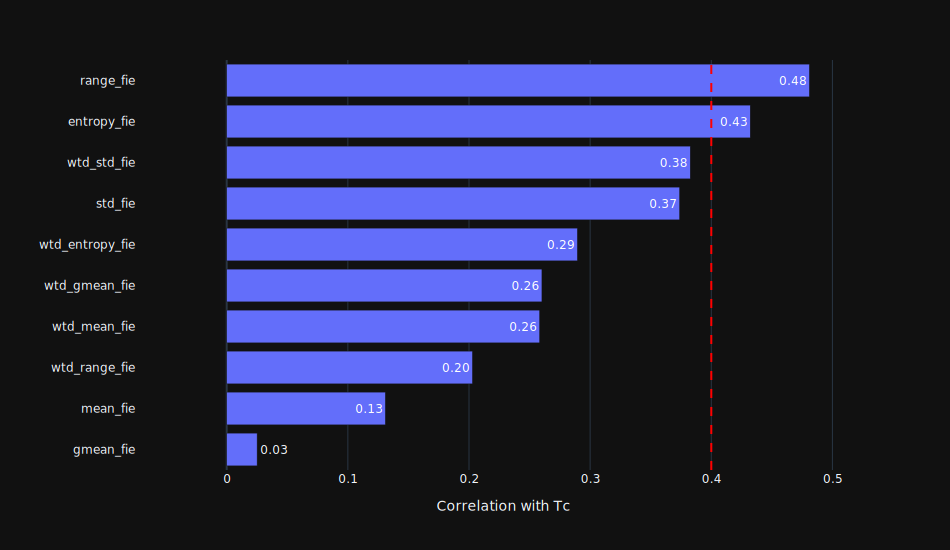

Features that have high correlation (>0.4 or <-0.4) with critical temp are
entropy_fie, range_fie


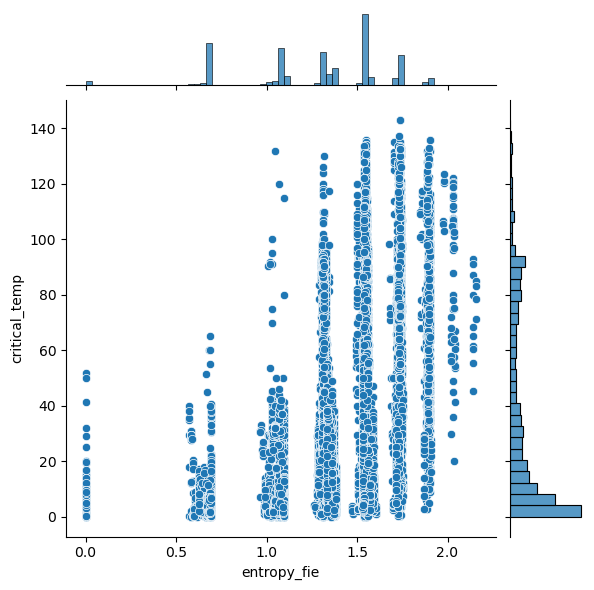

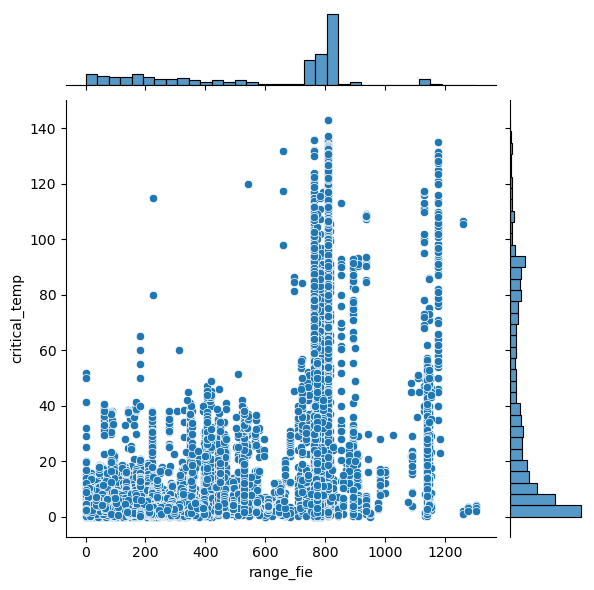

atomic_radius


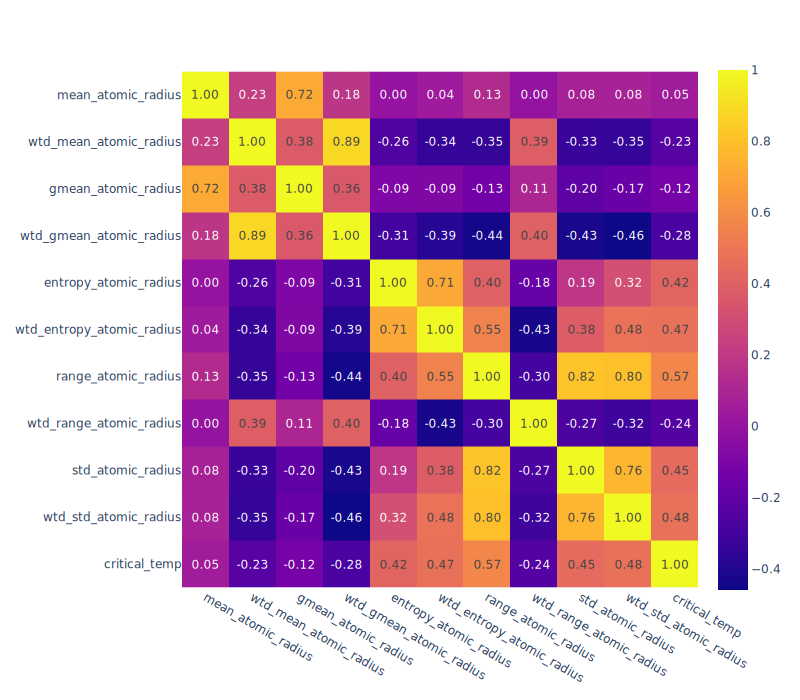

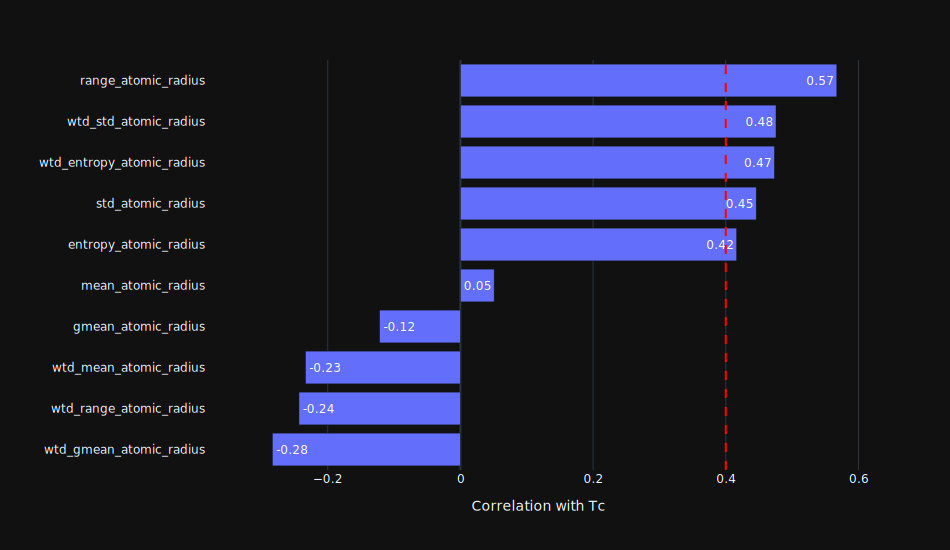

Features that have high correlation (>0.4 or <-0.4) with critical temp are
entropy_atomic_radius, std_atomic_radius, wtd_entropy_atomic_radius, wtd_std_atomic_radius, range_atomic_radius


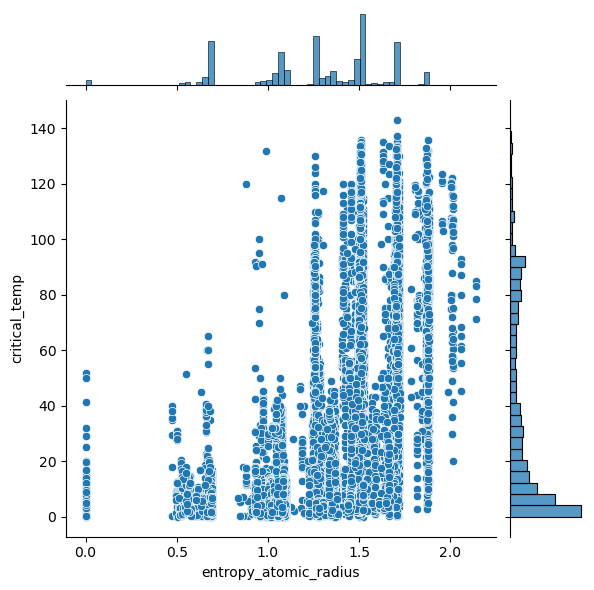

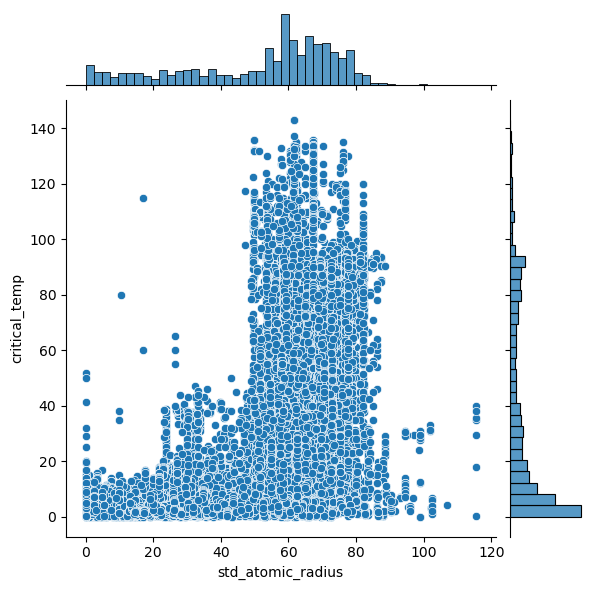

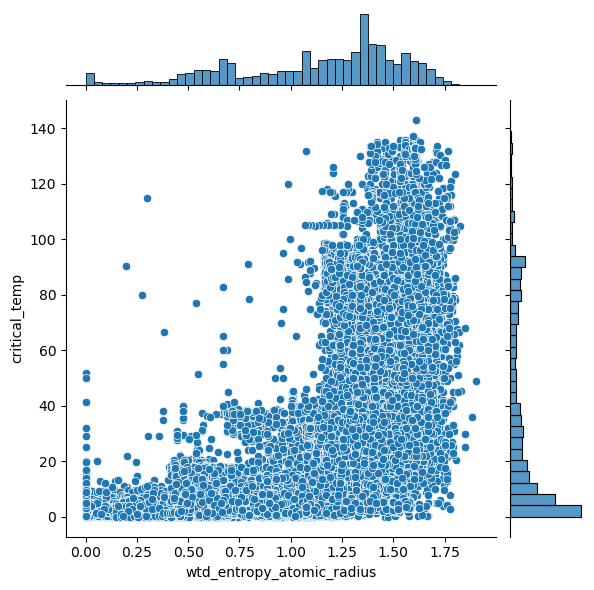

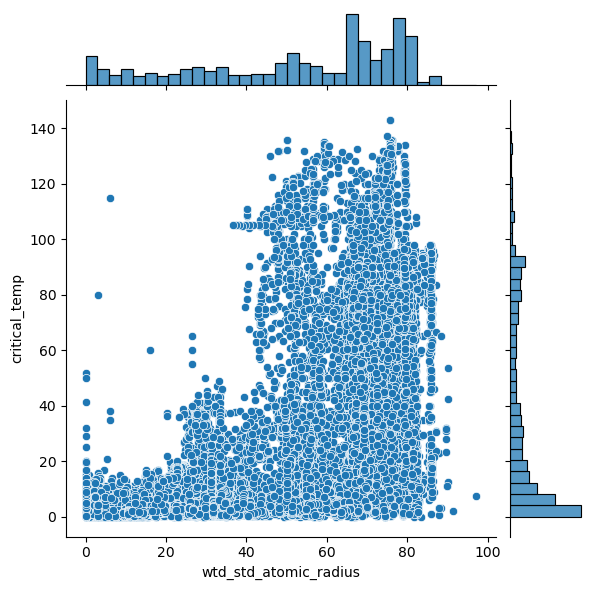

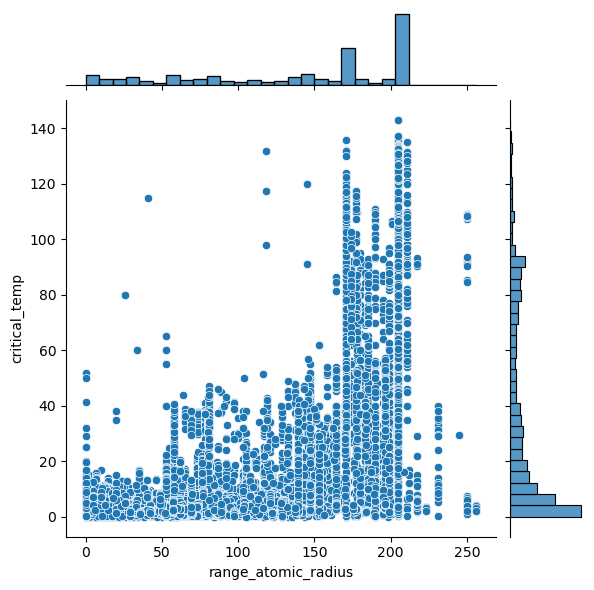

Density


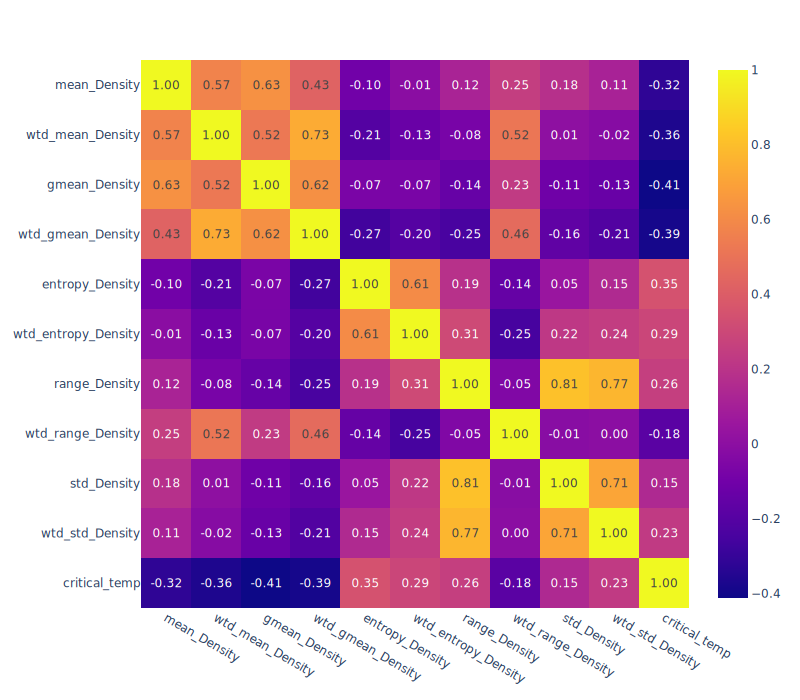

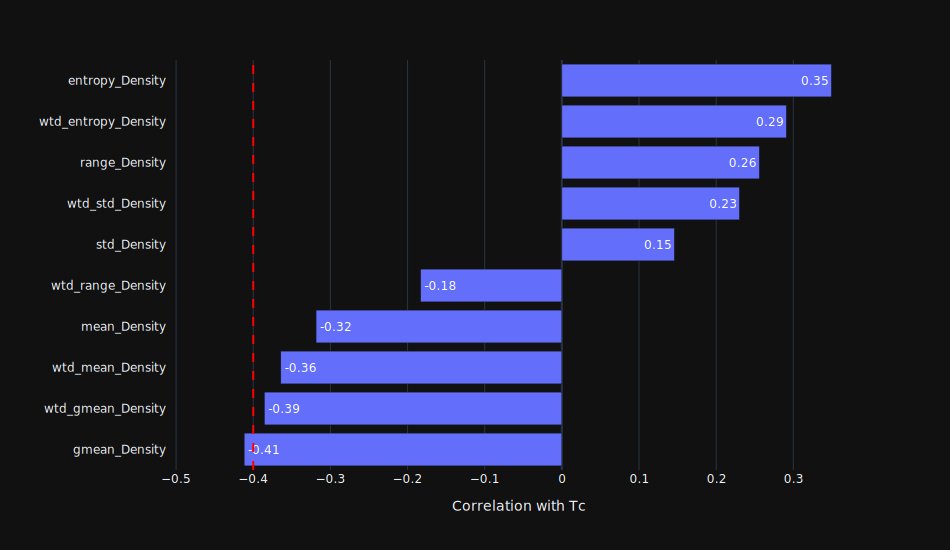

Features that have high correlation (>0.4 or <-0.4) with critical temp are
gmean_Density


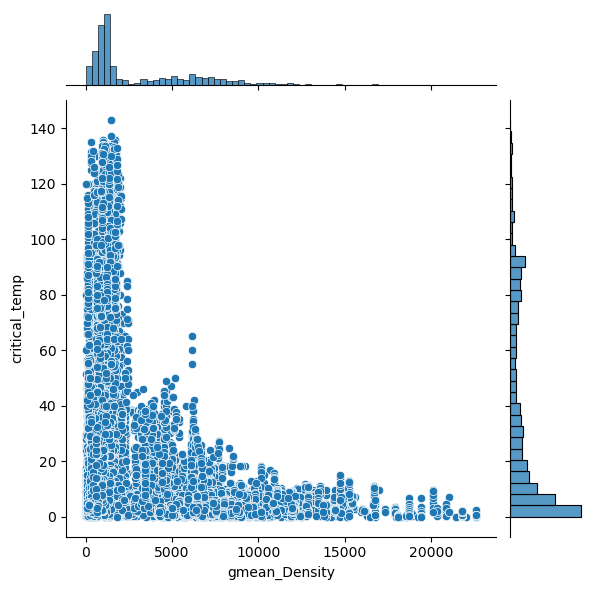

ElectronAffinity


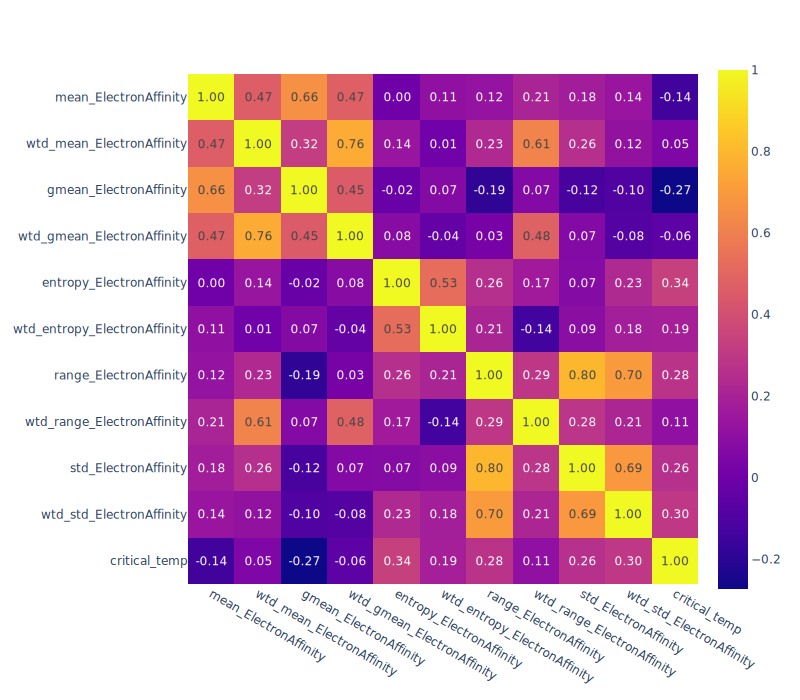

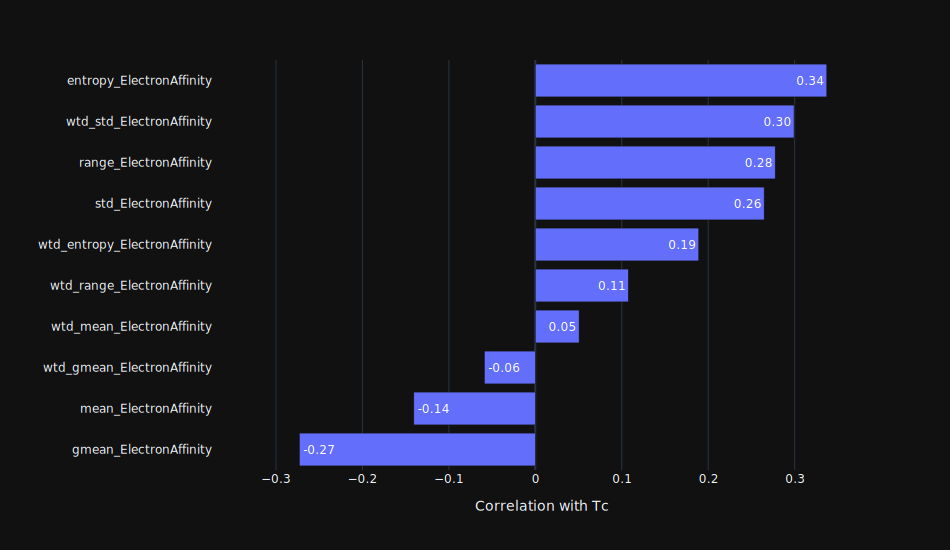

Features that have high correlation (>0.4 or <-0.4) with critical temp are

FusionHeat


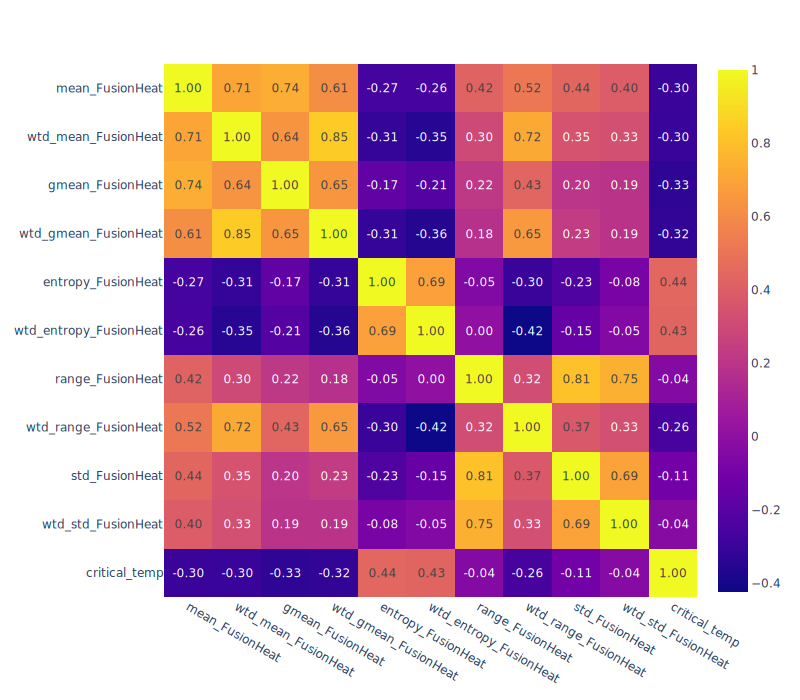

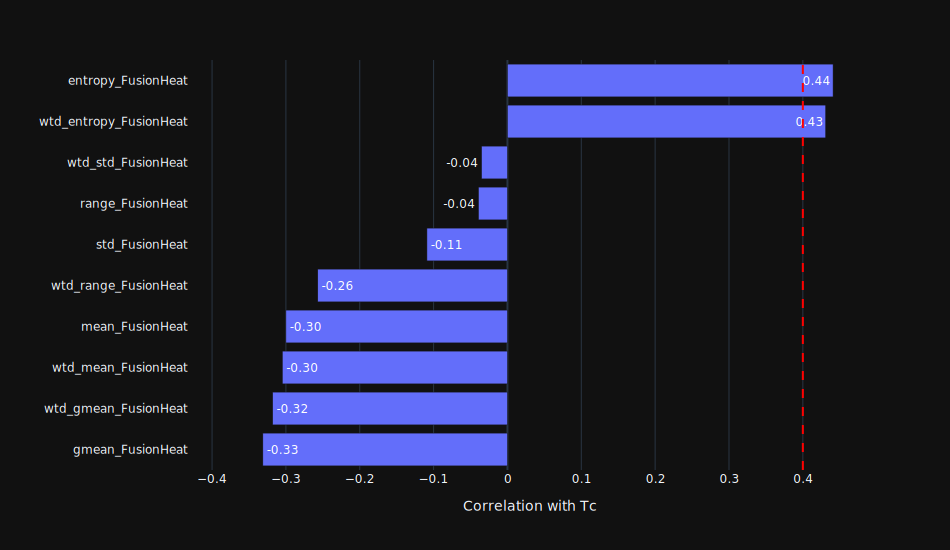

Features that have high correlation (>0.4 or <-0.4) with critical temp are
wtd_entropy_FusionHeat, entropy_FusionHeat


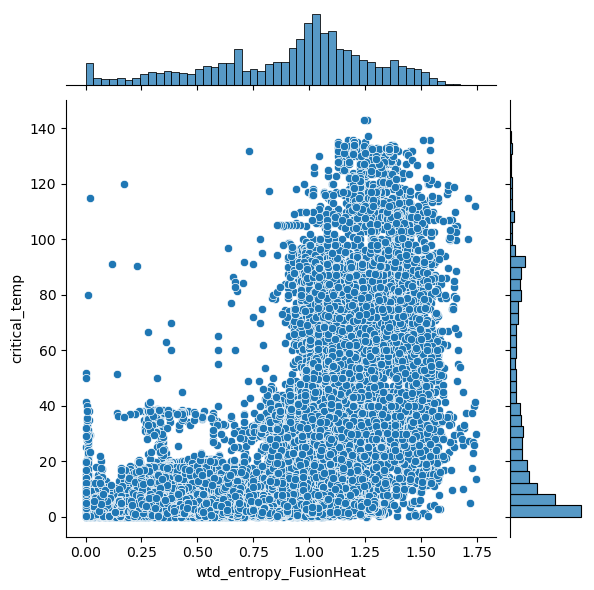

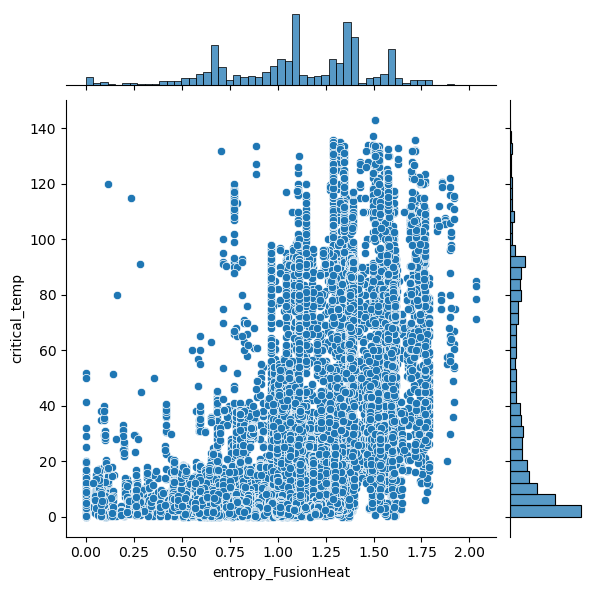

ThermalConductivity


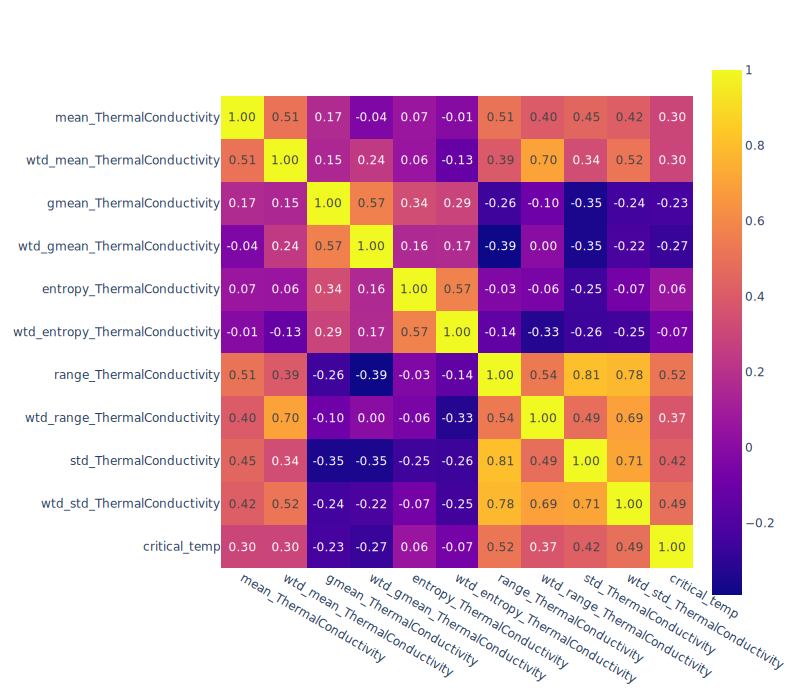

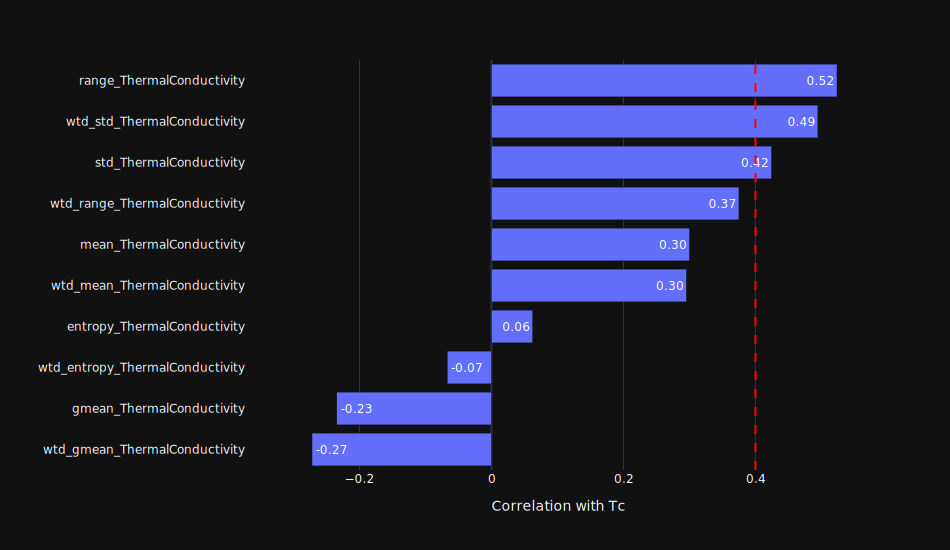

Features that have high correlation (>0.4 or <-0.4) with critical temp are
std_ThermalConductivity, wtd_std_ThermalConductivity, range_ThermalConductivity


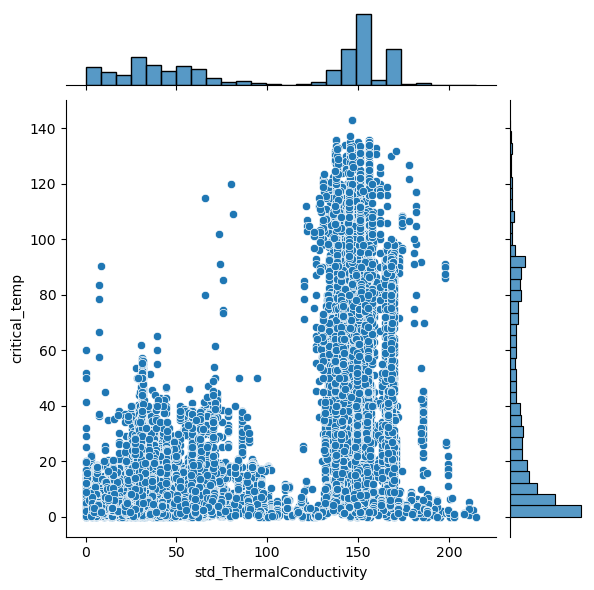

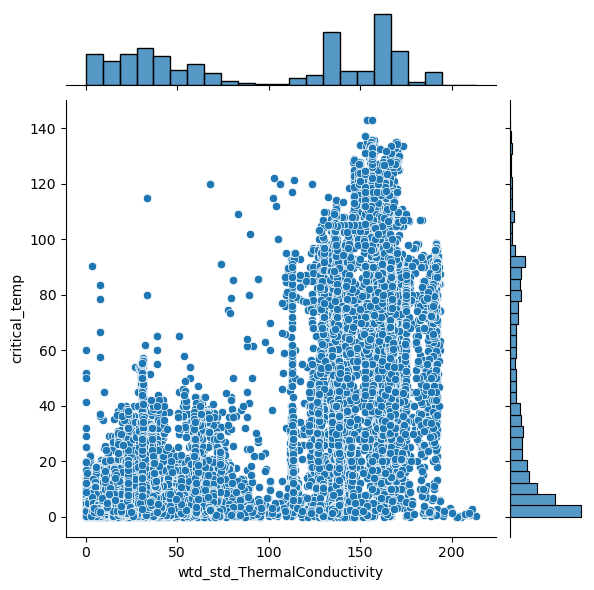

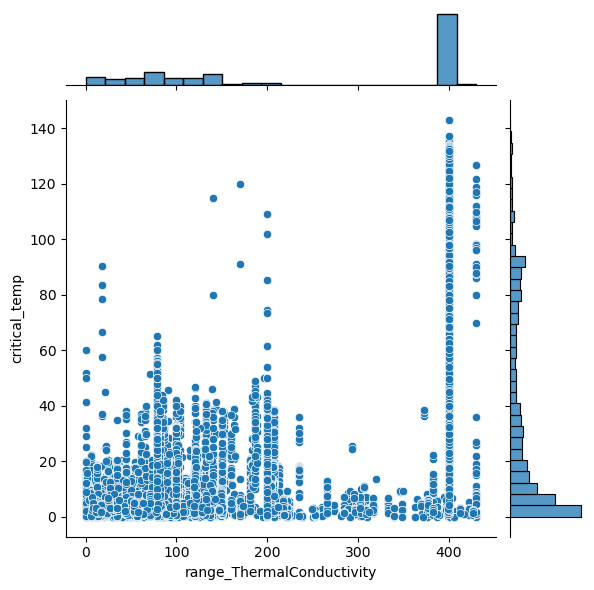

Valence


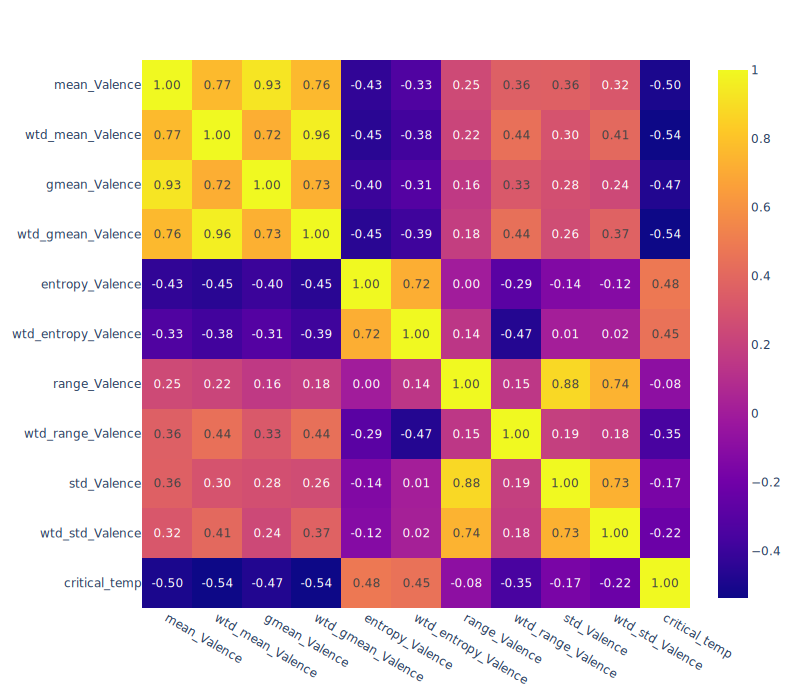

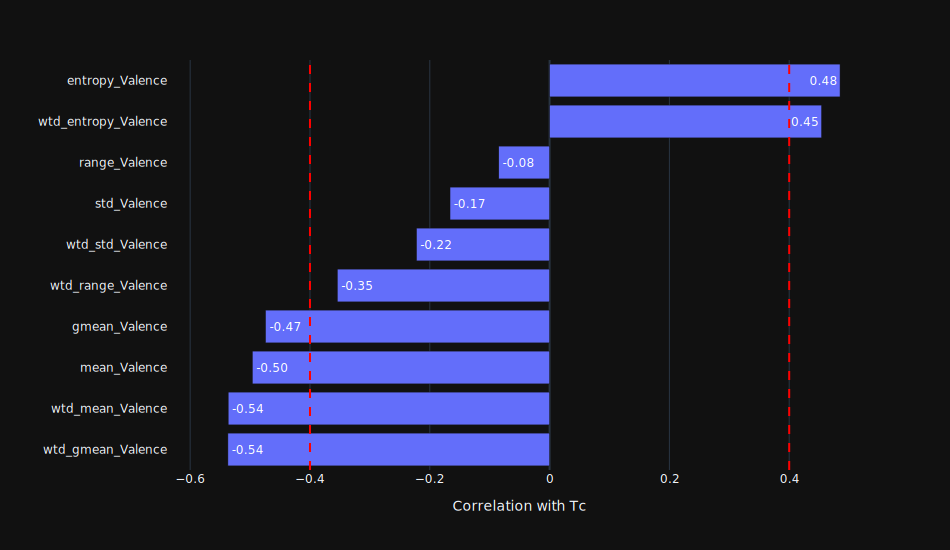

Features that have high correlation (>0.4 or <-0.4) with critical temp are
wtd_gmean_Valence, wtd_mean_Valence, mean_Valence, gmean_Valence, wtd_entropy_Valence, entropy_Valence


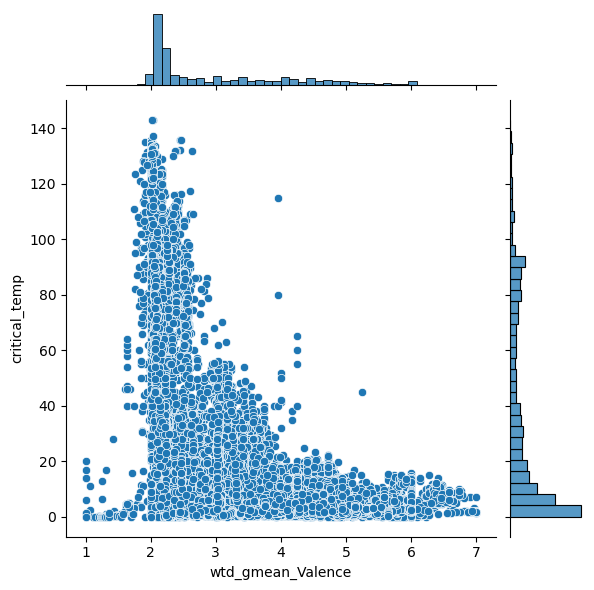

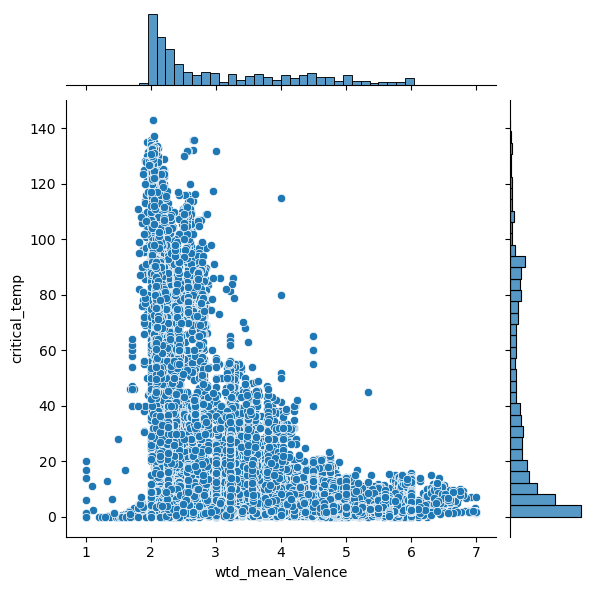

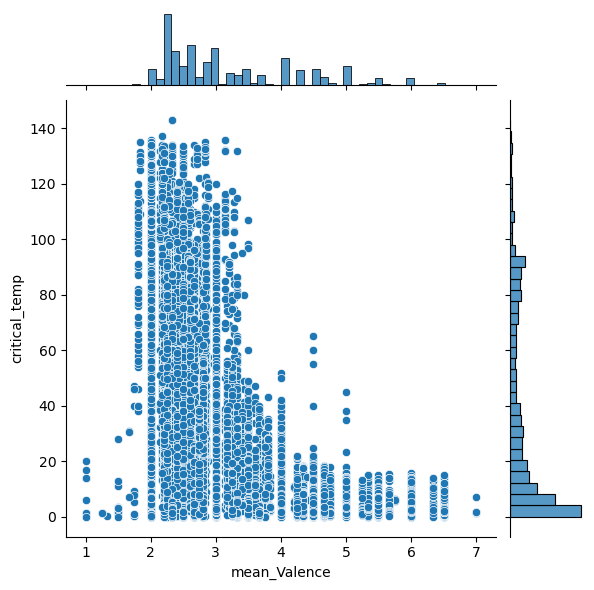

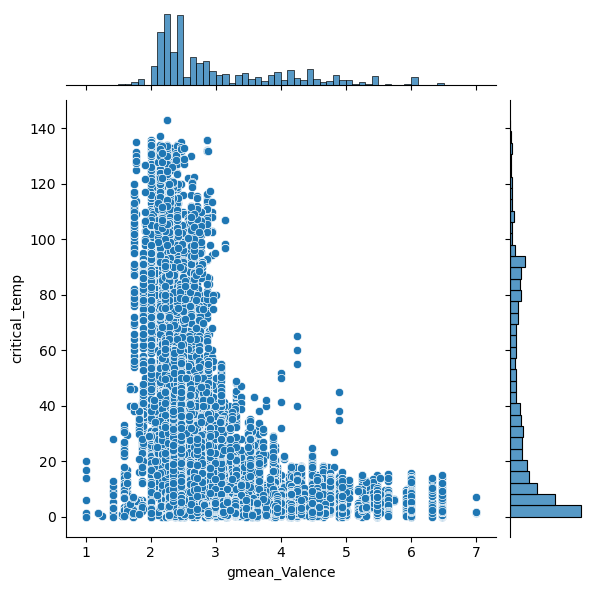

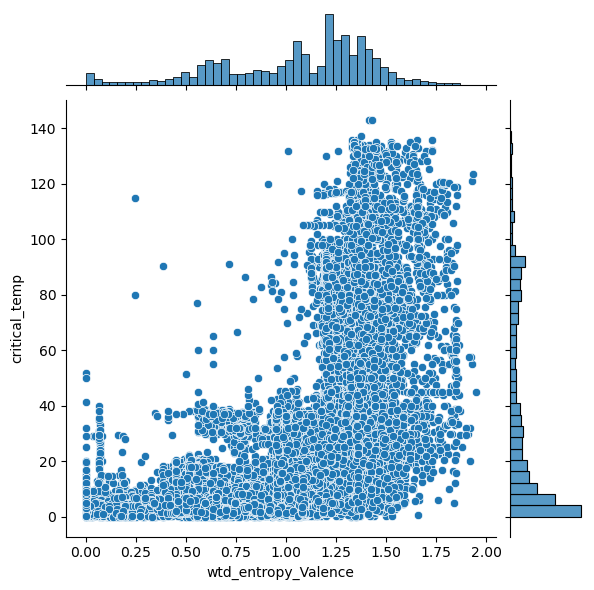

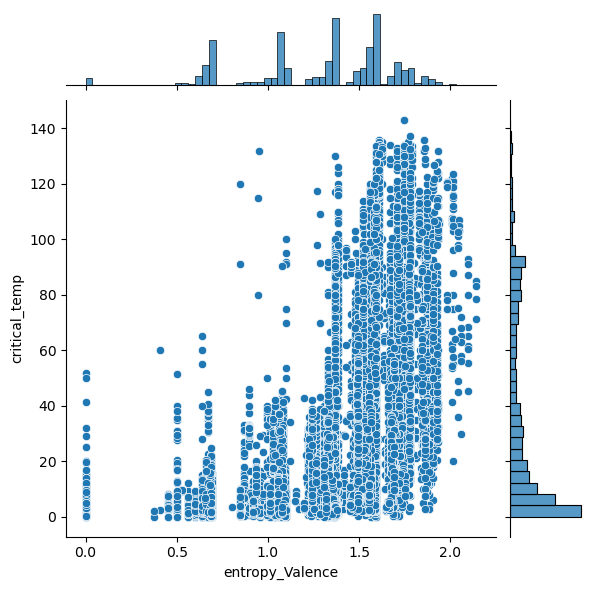

In [12]:
corr_df = pd.DataFrame({'Correlation':[]})
for i in properties:
    print(i)
    df = data.filter(regex=i+'|critical')
    corr_df = pd.concat([corr_df,Tc_corr(df)])

In [13]:
corr_df.abs().nlargest(10, 'Correlation')

,Correlation
range_atomic_radius,0.567396
wtd_gmean_Valence,0.537031
wtd_mean_Valence,0.536574
range_ThermalConductivity,0.523611
mean_Valence,0.496262
wtd_std_ThermalConductivity,0.494638
wtd_entropy_atomic_mass,0.486435
entropy_Valence,0.484890
range_fie,0.481011
wtd_std_atomic_radius,0.475734


These are top 10 features with the highest correlation (Kendall) with superconducting temperature.

# Save cleaned data<a id='save'><a>

In [14]:
data.to_csv('../data/processed/data_cleaned.csv', index=False)

In [15]:
materials.to_csv('../data/processed/materials_cleaned.csv', index=False)